# Approach to the Problem

#### Pre-process the data: impute the missing values, normalize the variables. etc.
#### Define the architecture of your model
#### Since it is a regression problem, make sure that you use the 'linear' activation function in the output layer
#### Train your model
#### Do the same pre-processing steps on test set as you did for the training set
#### Generate predictions for the test set using the trained model
#### Save the predictions in a csv file (to check the format, refer to the sample submission file provided on the problem page)
#### Submit your predictions on the problem page and check your rank on the leaderboard.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [79]:
print('Version of pandas:', pd.__version__)

Version of pandas: 1.5.3


In [80]:
# load train and test datasets
df = pd.read_csv('train_XnW6LSF.csv')


In [81]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [82]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [83]:
#preprocessing the dataset

# Item_Weight and Outlet_Size have missing values
# Item_Weight is a continuous variable, so we can impute it with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
# Outlet_Size is a categorical variable, so we can impute it with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)





In [84]:
#show unique values in dataset
print("Unique values in dataset: ",df['Item_Identifier'].nunique())

Unique values in dataset:  1559


In [85]:
#show categorical attributes
cat_attr = df.select_dtypes(include=['object']).copy()
cat_attr.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [86]:
#show the categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'O']
cat_col

#remove the Item_Identifier and Outlet_Identifier columns
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [87]:
# print the categorical columns in the dataset
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    



Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [88]:
# combine item fat content of Low Fat and LF and low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

# combine item fat content of Regular and reg to Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Regular', 'reg'], 'Regular')



df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [89]:
# create new attributes
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [90]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

In [91]:
# add non consumable category
df.loc[df['Item_Identifier'].str[0:2] == 'NC', 'New_Item_Type'] = 'Non-Consumable'

df.loc[df['New_Item_Type'] == 'Non-Consumable', 'New_Item_Type'] = 'Non-Consumable'
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [92]:
# create small values for normalizing year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [93]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [94]:
#Exploratory data analaysis of Big Mart Sales Data


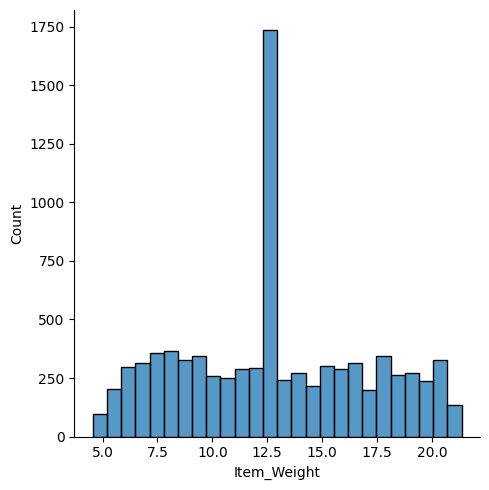

In [95]:
sns.displot(df['Item_Weight'])

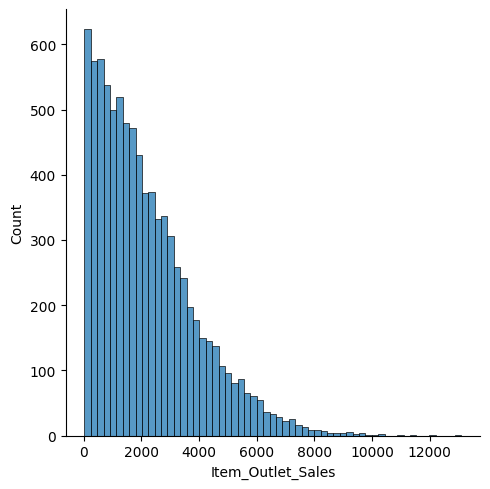

In [96]:
sns.displot(df['Item_Outlet_Sales'])

In [97]:
# using log transformation to normalize Item_Outlet_Sales
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
# using log transformation to normalize Item_MRP
df['Item_MRP'] = np.log(1+df['Item_MRP'])
# using log transformation to normalize Item_Visibility
df['Item_Visibility'] = np.log(1+df['Item_Visibility'])
# using log transformation to normalize Item_Weight
df['Item_Weight'] = np.log(1+df['Item_Weight'])



<Axes: xlabel='Item_Fat_Content', ylabel='count'>

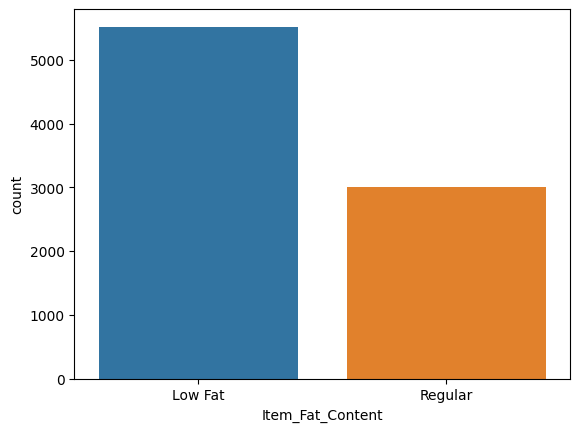

In [98]:
#seeing categorical variables in sns.countplot
sns.countplot(x='Item_Fat_Content',data=df)

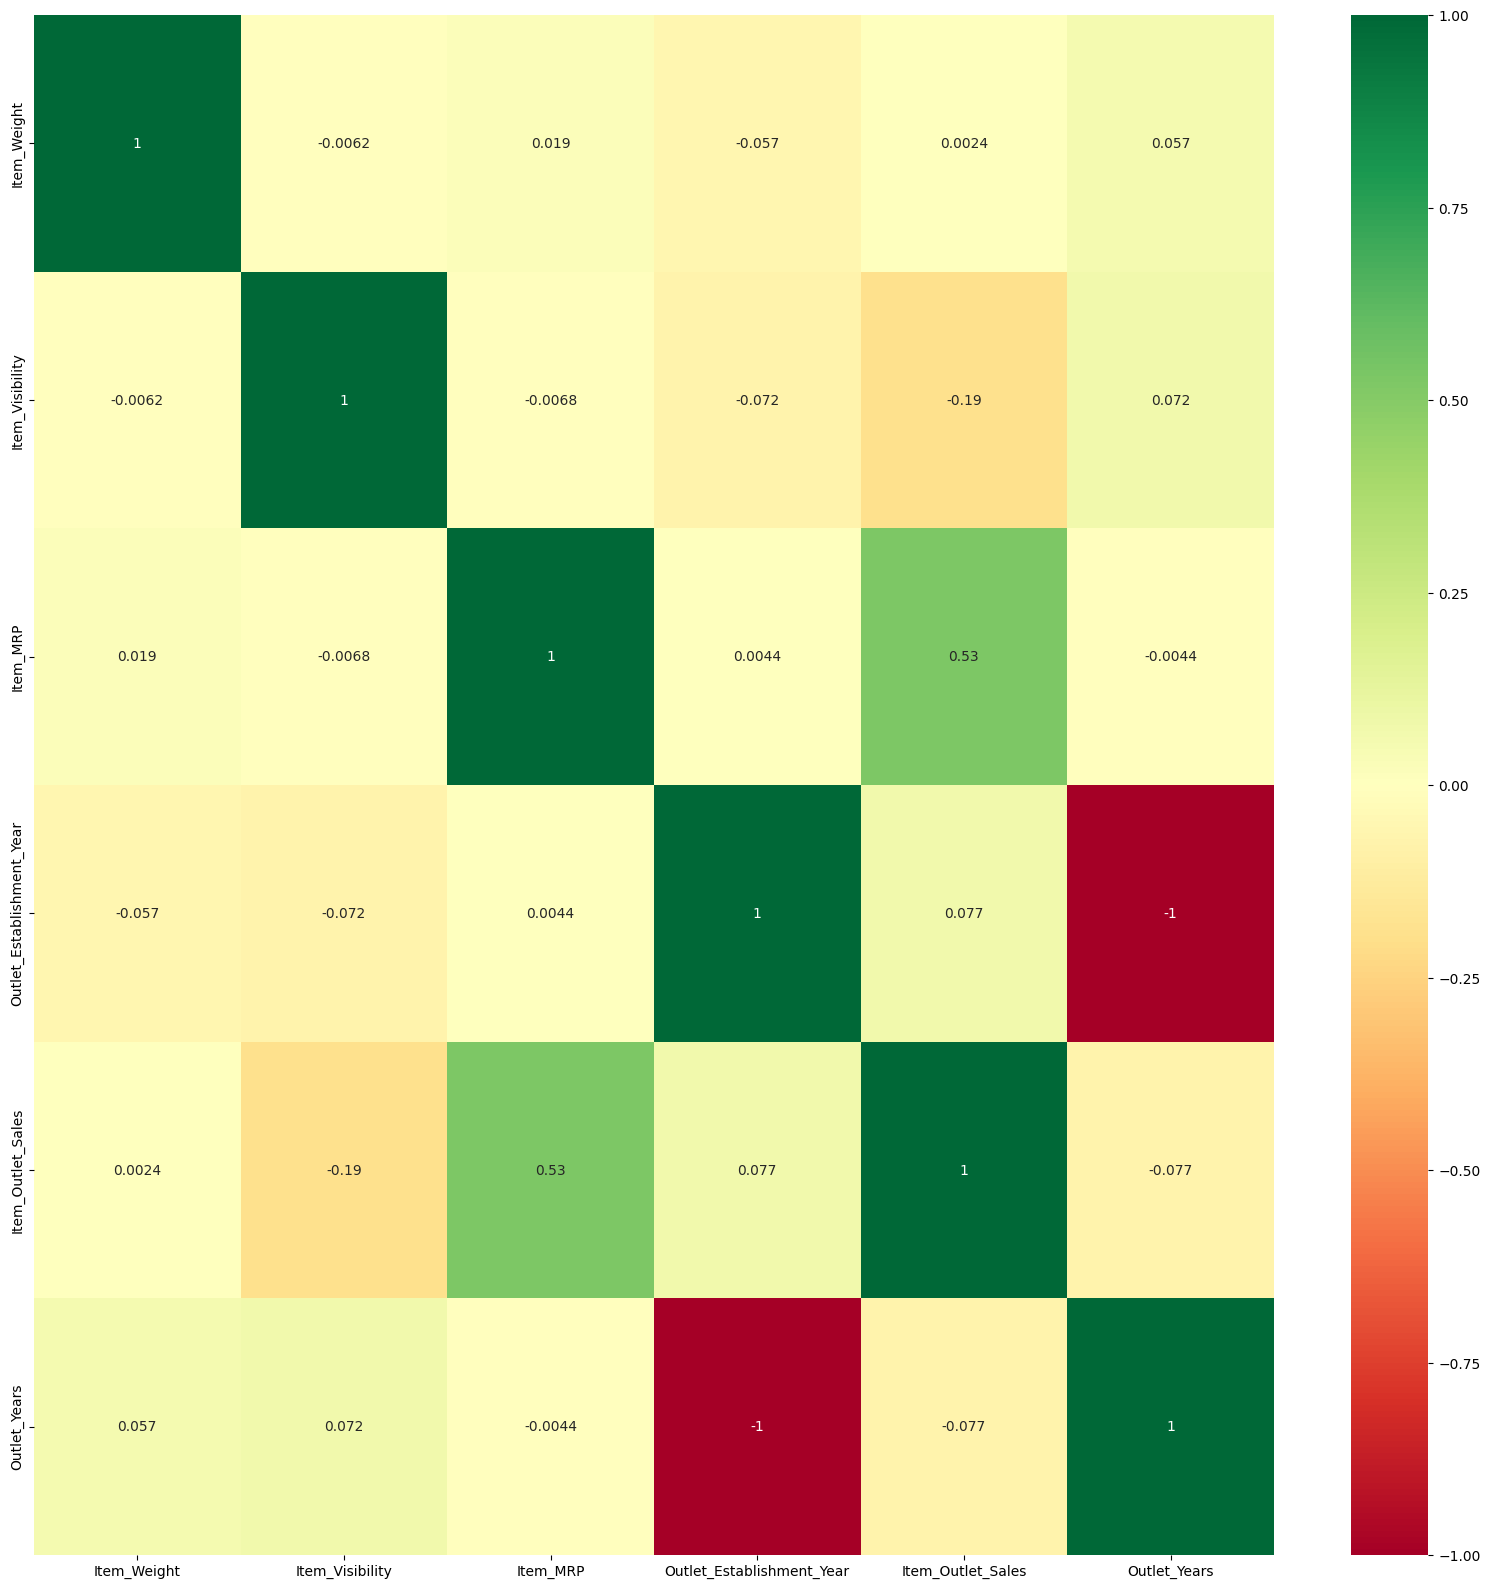

In [99]:
#making coorelation matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [100]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])



In [101]:
# using onehot encoding for categorical variables
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type', 'New_Item_Type'])

df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,2.332144,0.015920,4,5.524692,OUT049,1999,8.225808,14,1,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,1.934416,0.019095,14,3.897299,OUT018,2009,6.096776,4,0,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,2.917771,0.016621,10,4.960170,OUT049,1999,7.648868,14,1,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,3.005683,0.000000,6,5.210005,OUT010,1998,6.597664,15,0,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,2.295560,0.000000,9,4.004810,OUT013,1987,6.903451,26,1,...,1,0,0,0,1,0,0,0,0,1


In [103]:
# train-test split
x = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])
y = df['Item_Outlet_Sales']

In [104]:
# model training and prediction

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x,y):
    # fit the model
    model.fit(x,y)
    
    # predict the training set
    pred = model.predict(x)
    
    # perform cross-validation
    cv_score = cross_val_score(model, x, y, scoring='mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print('Model Report')
    print('MSE:', mean_squared_error(y, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 0.2664261864119901
CV Score: 0.2673343441019101


<Axes: title={'center': 'Model Coefficients'}>

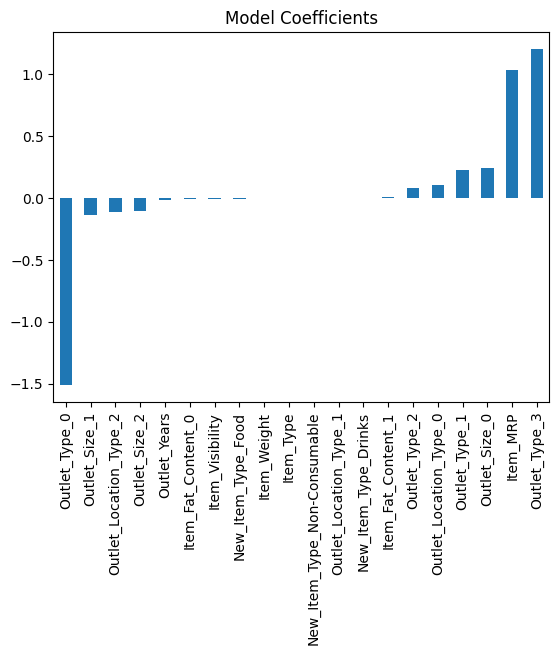

In [107]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')


Model Report
MSE: 0.0
CV Score: 0.5834569371898822


<Axes: title={'center': 'Feature Importances'}>

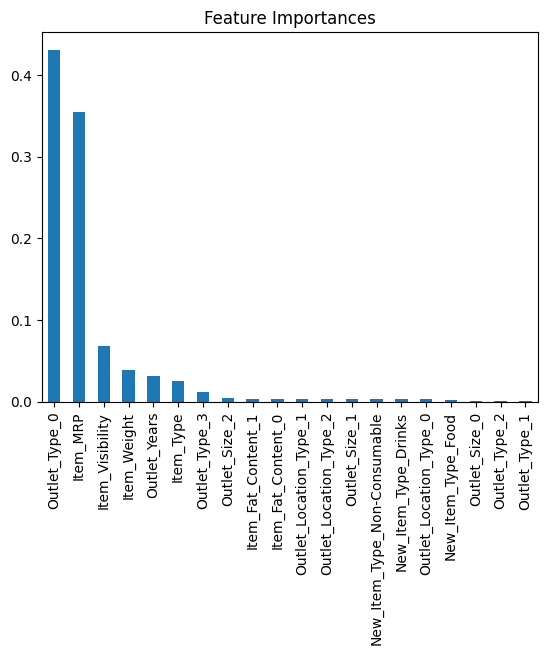

In [108]:
#using decision tree 
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importances')
